# Reporte 4
Nombre: Gianfranco Polar

Código: 20200841

## Lectura

El texto de Mendoza tiene como objetivo analizar los cambios en la política monetaria de Estados Unidos, elaborada por la Reserva Federal. Mendoza explica que la Reserva Federal, usualmente acostumbrada a formular políticas basadas en ajustes en la tasa de interés, se vio obligada por la crisis financiera de 2008 a utilizar métodos no convencionales, como el anuncio de la trayectoria futura de la tasa de interés y la compra directa en el mercado de bonos de largo plazo. El método usado por Mendoza para analizar el impacto de la política monetaria es el tradicional modelo keynesiano, elaborado por Hicks, de equilibrio IS-LM-BB. En ese sentido, la fortaleza principal del documento es la capacidad de utilizar un modelo tradicional para explicar dinámicas recientes en la política monetaria de los Estados Unidos. El modelo es capaz de predecir los efectos a corto y largo plazo de las medidas no convencionales de la Reserva Federal. Una debilidad que presenta el enfoque de investigación es su incapacidad de sintetizar el análisis macroeconómico en argumentos que permitan entender por que este modelo es el más adecuado. No obstante, Mendoza sí logra responder a las interrogantes de la investigación, y su mayor aporte al tema es la demostración de que modelos tradicionales, considerados "antiguos" y "obsoletos" sí pueden servir para explicar el impacto de la política monetaria en un contexto actual.

## Código

In [193]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd

En el modelo de equilibrio en el mercado de bienes y dinero, las ecuaciones IS:

$$ r = \frac{B_o}{h} - \frac{B_1}{h}Y $$
y LM:
$$ r = -\frac{1}{j}\frac{Mo^s}{P_o} + \frac{k}{j}Y $$

tienen valores iguales:

$$ -\frac{1}{j}\frac{Mo^s}{P_o} + \frac{k}{j}Y = \frac{B_o}{h} - \frac{B_1}{h}Y$$

Resolviendo la ecuación por el método de sustitución, igualación o reducción, se obtienen los valores en equilibrio de el ingreso ($Y^e$) y la tasa de interés ($r^e$):

$$ Y^e = \frac{j B_o}{k h + j B_1} + (\frac{h}{k h + j B_1})\frac{Ms_o}{P_o} $$

$$ r^e = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})\frac{Ms_o}{P_o} $$

In [194]:
#Curva IS

#Parámetros

Y_size = 100 

Co = 45
Io = 30
Go = 35
Xo = 2
h = 0.7
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)

#Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y  
    return r_IS

r_is = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#Curva LM 

#Parámetros

Y_size = 100

k = 2
j = 1            
Ms = 300             
P  = 30                    

Y = np.arange(Y_size)

#Ecuación

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

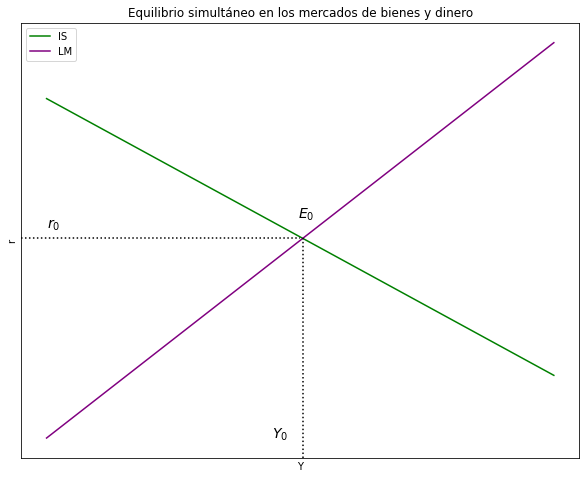

In [195]:
# Dimensiones 
y_max = np.max(r_lm)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas
# IS
ax.plot(Y, r_is, label = "IS", color = "green") #Curva IS
# LM
ax.plot(Y, r_lm, label="LM", color = "purple")  #Curva LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
plt.axvline(x=50,  ymin= 0, ymax= 0.51, linestyle = ":", color = "black")
plt.axhline(y=90, xmin= 0, xmax= 0.50, linestyle = ":", color = "black")

# Plotear los textos 
plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,95, '$r_0$', fontsize = 14, color = 'black')
plt.text(44,-10, '$Y_0$', fontsize = 14, color = 'black')

# Título, ejes y leyenda
ax.set(title="Equilibrio simultáneo en los mercados de bienes y dinero", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

### Estática comparativa:

**Analice los efectos sobre las variables endógenas Y, r de una disminución del gasto fiscal ($∆G_o < 0$). El análisis debe ser intuitivo, matemático y gráfico.**

***Análisis intuitivo***

En el mercado de bienes:
$$ Go↓ → DA↓ → Y>DA → Y↓ $$
En el mercado de dinero:
$$ Y↓ → M_d↓ → M_s>M_d → r↓ $$

***Análisis matemático***
$$  ΔY=\dfrac{j*(C_0+I_0+ΔG_0+X_0)}{\beta_1*j+k*h}+\dfrac{h}{\beta_1*j+k*h}*\dfrac{M_0^s}{P_0}  $$

$$  ΔY=\dfrac{j*ΔG_0}{\beta_1*j+k*h}  $$

$$  \dfrac{ΔY}{ΔG_0}=\dfrac{j}{\beta_1*j+k*h}<0  $$

$$  Δr=\dfrac{k*(C_0+I_0+ΔG_0+X_0)}{h*k-j*\beta_1}-\dfrac{\beta_1}{h*k-j*\beta1}*\dfrac{M_0^s}{P_0}  $$

$$  Δr=\dfrac{k*ΔG_0}{h*k-j*\beta_1}  $$

$$  \dfrac{Δr}{ΔG_0}=\dfrac{k}{h*-j*\beta_1}<0  $$

***Análisis gráfico***

In [196]:
#Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 45
Go = 45
Xo = 2
h = 0.4
b = 0.2
m = 0.3
t = 0.4

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 300             
P  = 30               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [197]:
#NUEVA curva IS: reducción Gasto de Gobierno (Go)
    
# Definir SOLO el parámetro cambiado
Go = 25

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

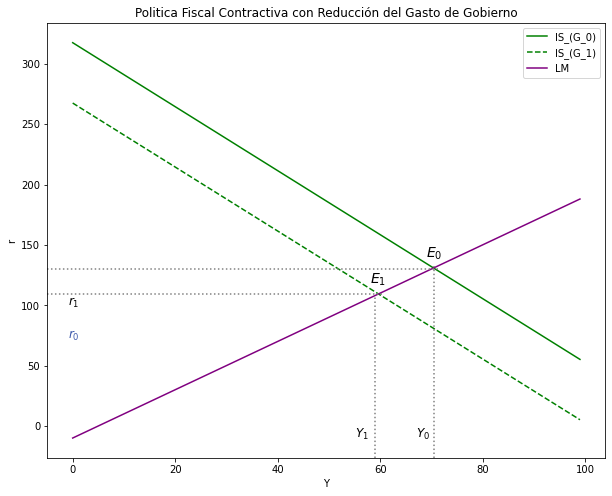

In [198]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_(G_0)", color = "green") #IS_orginal
ax.plot(Y, r_G, label = "IS_(G_1)", color = "green", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "purple")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=70.5,  ymin= 0, ymax= 0.44, linestyle = ":", color = "grey")
plt.axhline(y=130, xmin= 0, xmax= 0.70, linestyle = ":", color = "grey")

plt.axvline(x=59,  ymin= 0, ymax= 0.37, linestyle = ":", color = "grey")
plt.axhline(y=109, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
plt.text(69,140, '$E_0$', fontsize = 14, color = 'black')

plt.text(58,118, '$E_1$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_1$', fontsize = 12, color = 'black')
plt.text(55,-10, '$Y_1$', fontsize = 12, color = 'black')
plt.text(-1,72, '$r_0$', fontsize = 12, color = '#3D59AB')
plt.text(67,-10, '$Y_0$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="Politica Fiscal Contractiva con Reducción del Gasto de Gobierno", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

**Analice los efectos sobre las variables endógenas Y, r de una disminución de la masa monetaria ($∆M_s < 0$). El análisis debe ser intuitivo, matemático y gráfico.**

***Análisis intuitivo***

En el mercado de dinero:
$$ M_s↓ → M_d>M_s → r↑ $$
En el mercado de bienes:
$$ M_d↓ → Y↓ → Y>DA → Y↓ $$

***Análisis matemático***
$$  ΔY=\dfrac{j*\beta_0}{\beta1*j+k*h}+\dfrac{h}{\beta_1*j+k*h}*\dfrac{ΔM_0^s}{P_0}  $$

$$  ΔY=\dfrac{h}{\beta_1*j*k*h}*\dfrac{ΔM_0^s}{P_0}  $$

$$  \dfrac{ΔY}{ΔM_0^s}=\dfrac{h}{(\beta_1*j+k*h)*P_0}<0  $$

$$  Δr=\dfrac{k*\beta_0}{h*k-j*\beta_1}-\dfrac{\beta_1}{h*k-j*\beta_1}*\dfrac{ΔM_0^s}{P_0}  $$

$$  Δr=-\dfrac{\beta_1}{h*k-j*\beta_1}*\dfrac{ΔM_0^s}{P_0}  $$

$$  \dfrac{Δr}{ΔM_0^s}=-\dfrac{\beta_1}{(h*k-j*\beta_1)*P_0}>0  $$

***Análisis gráfico***

In [199]:
#Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 45
Io = 35
Go = 45
Xo = 2
h = 0.9
b = 0.5
m = 0.6
t = 0.7

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


# Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 800
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [200]:
#Nueva Curva LM: reducción de la masa monetaria (M_s)
# Definir SOLO el parámetro cambiado
Ms = 200

# Nueva Curva LM
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

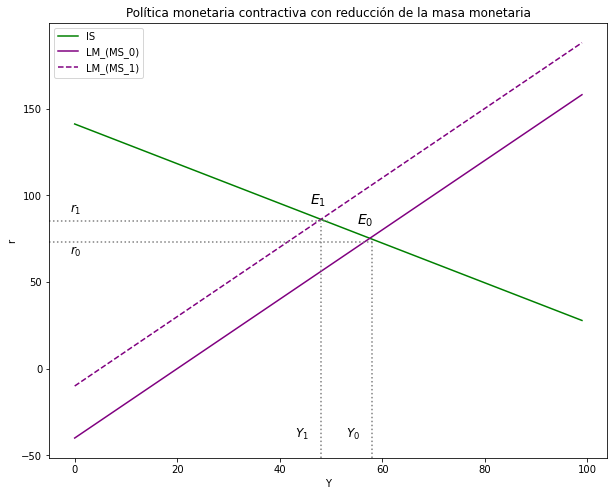

In [201]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "green") #IS_orginal
ax.plot(Y, i, label="LM_(MS_0)", color = "purple")  #LM_original

ax.plot(Y, i_Ms, label="LM_(MS_1)", color = "purple", linestyle = 'dashed')  #LM_modificada

# Lineas de equilibrio_0 
plt.axvline(x=48,  ymin= 0, ymax= 0.54, linestyle = ":", color = "grey")
plt.axhline(y=73, xmin= 0, xmax= 0.58, linestyle = ":", color = "grey")

# Lineas de equilibrio_1 
plt.axvline(x=58,  ymin= 0, ymax= 0.5, linestyle = ":", color = "grey")
plt.axhline(y=85, xmin= 0, xmax= 0.5, linestyle = ":", color = "grey")

# Textos ploteados
plt.text(55,83, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,66, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
plt.text(46,95, '$E_1$', fontsize = 14, color = 'black')
plt.text(-1,90, '$r_1$', fontsize = 12, color = 'black')
plt.text(43,-40, '$Y_1$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="Política monetaria contractiva con reducción de la masa monetaria", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

**Analice los efectos sobre las variables endógenas Y, r de un aumento de la tasa de impuestos ($∆t < 0$). El análisis debe ser intuitivo, matemático y gráfico.**

***Análisis intuitivo***

En el mercado de dinero:
$$ M_s↓ → M_d>M_s → M_d↓ $$
En el mercado de bienes:
$$ M_d↓ → Y↓ → Y>DA → Y↓ $$

***Análisis matemático***
$$  ΔY=\dfrac{j*\beta_0+h}{j-j*b+j*m+(j*b-j*m)*Δt+k*h}*\dfrac{M_0^s}{P_0}<0  $$

$$  Δr=\dfrac{k*\beta_0}{h*k-j-j*b+j*m+(j*b-j*m)*Δt}-\dfrac{(1-b+m+(b-m)*Δt)}{h*k-j-j*b+j*m+(j*b-j*m)*Δt}*\dfrac{M_0^s}{P_0}<0  $$

***Análisis gráfico***

In [202]:
#Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 45
Go = 45
Xo = 2
h = 0.4
b = 0.2
m = 0.3
t = 0.15

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r0 = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

#Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 300             
P  = 30               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [203]:
#NUEVA curva IS: aumento de la tasa de impuestos (t)
    
# Definir SOLO el parámetro cambiado
t = 0.8

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r1 = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

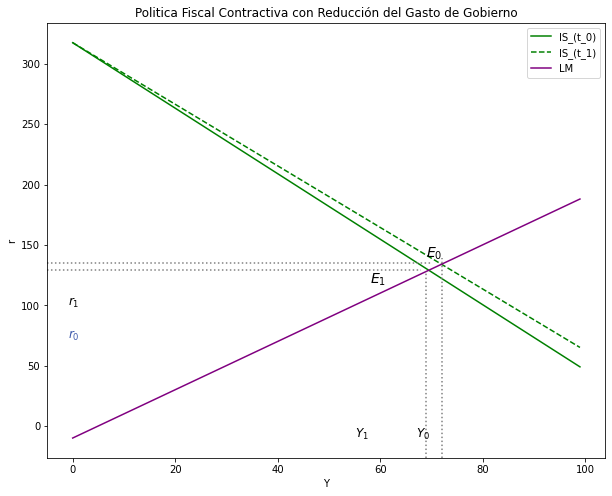

In [204]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r0, label = "IS_(t_0)", color = "green") #IS_orginal
ax.plot(Y, r1, label = "IS_(t_1)", color = "green", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "purple")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=69,  ymin= 0, ymax= 0.43, linestyle = ":", color = "grey")
plt.axhline(y=129.5, xmin= 0, xmax= 0.67, linestyle = ":", color = "grey")

plt.axvline(x=72,  ymin= 0, ymax= 0.46, linestyle = ":", color = "grey")
plt.axhline(y=135, xmin= 0, xmax= 0.69, linestyle = ":", color = "grey")
plt.text(69,140, '$E_0$', fontsize = 14, color = 'black')

plt.text(58,118, '$E_1$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_1$', fontsize = 12, color = 'black')
plt.text(55,-10, '$Y_1$', fontsize = 12, color = 'black')
plt.text(-1,72, '$r_0$', fontsize = 12, color = '#3D59AB')
plt.text(67,-10, '$Y_0$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="Politica Fiscal Contractiva con Reducción del Gasto de Gobierno", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()